# Clase 15: gráficos *pro* con `Plotly`

En esta clase usaremos la libería `plotly` para ver visualizaciones y tablas. 
`Plotly` es un paquete potente que permite realizar gráficos interactivos de gran calidad visual. 
Veremos: 
- Cómo instalar
- Tablas
- Gráfico de líneas
- Gráfico de puntos (scatter)
- Gráfico de barras
- Gráfico de torta
- Gráfico de burbujas
- Mapas de calor
- Histogramas
- Gráficos de error
- Bráfico de cajas

## 1. Introducción 
La librería plotly es una librería de python `open-source` que soporta más de 40 tipos de gráficos interactivos, en el ámbito estadístico, financiero, geográfico, científico, etc. 

Esta librería requiere algunos pasos adicionales en su instalación con respecto a otras librerías.

El detalle de la instalación lo pueden encontrar en el siguiente link: 
https://plotly.com/python/getting-started/


Pasos para instalar `plotly`: 
1. Abrir el Compand Prompt en Anaconda (pantalla negra). Los siguientes códigos los debe colocar en esta terminal. 
2. Pueden instalar mediante pip o conda: 
    - pip install plotly==4.14.3
    - conda install -c plotly plotly=4.14.3
3. Si van a trabajar desde **Jupyter Notebook** deben instlar los siguientes paquetes adicionales usando pip o conda: 
    - pip install "notebook>=5.3" "ipywidgets>=7.5"
    - conda install "notebook>=5.3" "ipywidgets>=7.5"
4. Si trabajan con **JupyterLab** deben instalar usando pip o conda: 
    - pip install jupyterlab "ipywidgets>=7.5"
    - conda install jupyterlab "ipywidgets>=7.5"
5. Instalar `nodejs`: 
    - Chequear si tiene instalado el programa. En el Command Prompt ejecutar *node -v*, le va a mostrar si tiene instalado el programa y qué versión tiene. Si lo tiene instalado saltar los siguientes dos pasos. 
    - Descargar el instalador para su sistema operativo: https://nodejs.org/es/download/
    - Ejecutar el archivo instalado 
6. Una vez tenga chequeado que tiene instalado el `nodejs` ejecutar: 
    - jupyter labextension install jupyterlab-plotly@4.14.3
    - Ver si la instalación arroja algún error! 
    
Una vez realizados estos 6 pasos, debería poder ejecutar el siguiente código en un `JupyterLab` y le debería mostrar un gráfico de barras. 

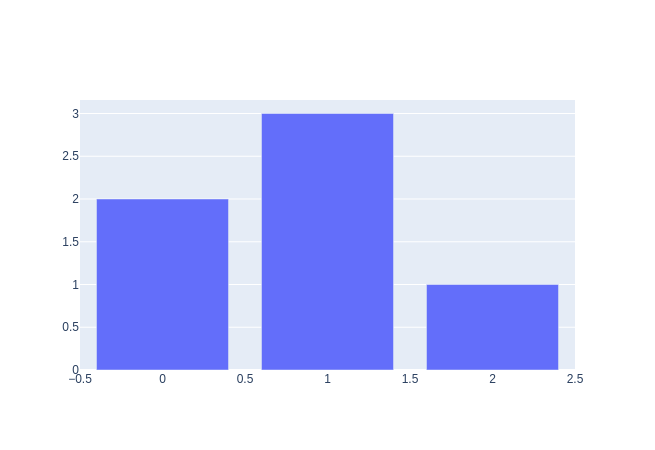

In [13]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()

## 2. Tablas
`go.Table` nos va a entragar un interfaz para visualizar datos mediante tablas, en formato de filas-columnas. 
Estas tablas las podemos *enchular* según las necesidades del caso. 


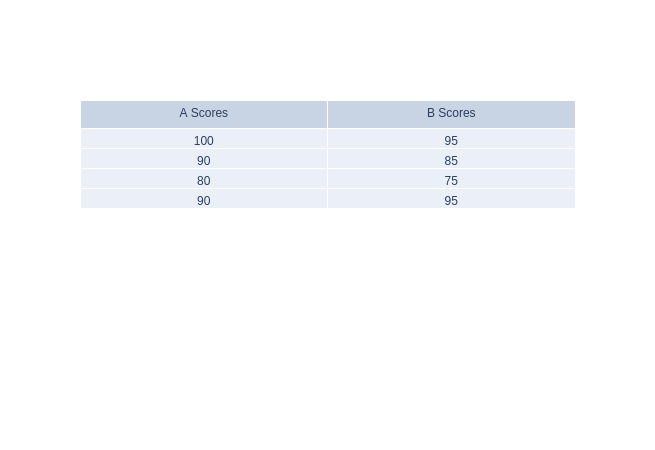

In [1]:
#Importar librería
import plotly.graph_objects as go

#Valores a mostrar 
encabezado = ['A Scores', 'B Scores']
valores = [[100, 90, 80, 90], [95, 85, 75, 95]]

#Crear figura
#1. llamar librería y función: go.Figure()
#2. Definir datos: data=[]
#3. Usar go.Table() para definir encabezado (header) y valores(cells)
#4. Guardamos el resultado en una variable -> alpicamos fig.show()
fig = go.Figure(data=[go.Table(header=dict(values=encabezado),
                               cells=dict(values=valores))
                     ])
fig.show()

Podemos arreglar 

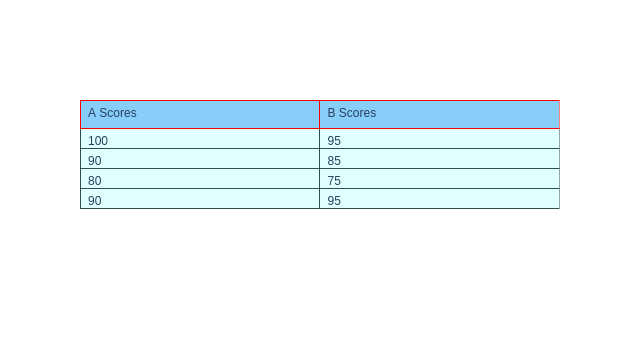

In [7]:
fig = go.Figure(data=[go.Table(
    #Encabezado
    header=dict(values=encabezado,
                line_color='red', #Color borde: cambiar rojo
                fill_color='lightskyblue', #Color fondo
                align='left'), #Alineación
    #Valores
    cells=dict(values=valores,
               line_color='darkslategray',#Color borde
               fill_color='lightcyan', #Color rojo
               align='left')) #Alineación
])

#Una vez creado el fig podemos editar su tamaño
fig.update_layout(width=300, height=300)
fig.show()

Para modificar el formato de los datos, ejemplo número de decimales, podemos usar `format`

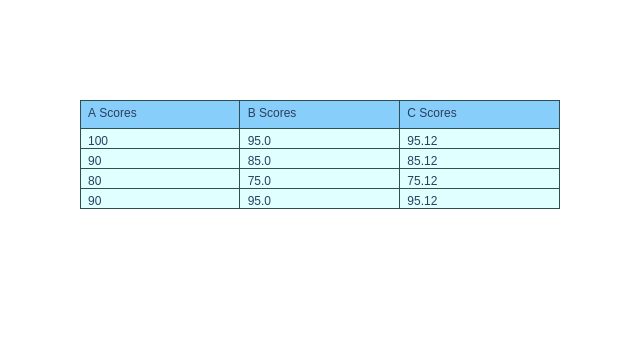

In [8]:
encabezado = ['A Scores', 'B Scores', 'C Scores']
valores = [[100, 90, 80, 90], [95, 85, 75, 95], [95.12345, 85.12345, 75.12345, 95.12345]]

fig = go.Figure(data=[go.Table(
    #Encabezado
    header=dict(values=encabezado,
                line_color='darkslategray', #Color borde: cambiar rojo
                fill_color='lightskyblue', #Color fondo
                align='left'), #Alineación
    #Valores
    cells=dict(values=valores,
               line_color='darkslategray',#Color borde
               fill_color='lightcyan', #Color rojo
               align='left', #Alineación
               format = [None, ".1f", ".2f"])) #Formato: en una lista va según el número de columnas
                ])

#Una vez creado el fig podemos editar su tamaño
fig.update_layout(width=400, height=300)
fig.show()

## 3. Gráficos de líneas
Para este ejemplo vamos a usar la librería `plotly.express`. Dentro de esta tenemos el DataFrame `gapminder` datos de expectativa de vida, población, PIB por país. 

In [10]:
#Importamos la librería
import plotly.express as px

#Usamos un subconjunto de los datos, seleccionamos América
df = px.data.gapminder().query("continent=='Americas'")
df.head()

country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
48  Argentina  Americas  1952   62.485  17876956  5911.315053       ARG   
49  Argentina  Americas  1957   64.399  19610538  6856.856212       ARG   
50  Argentina  Americas  1962   65.142  21283783  7133.166023       ARG   
51  Argentina  Americas  1967   65.634  22934225  8052.953021       ARG   
52  Argentina  Americas  1972   67.065  24779799  9443.038526       ARG   

    iso_num  
48       32  
49       32  
50       32  
51       32  
52       32

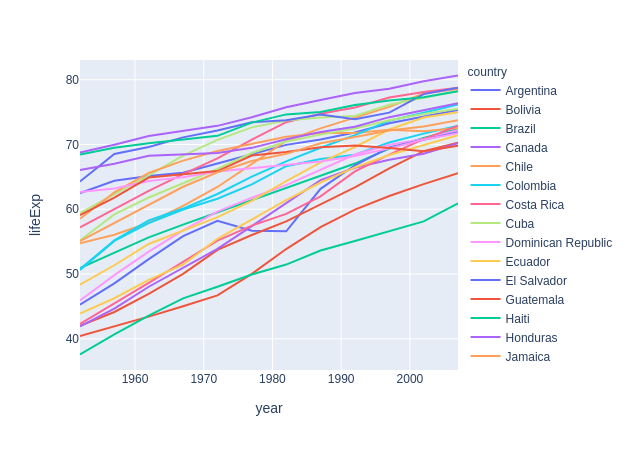

In [12]:
fig = px.line(df, x="year", y="lifeExp", color='country')
fig.show()

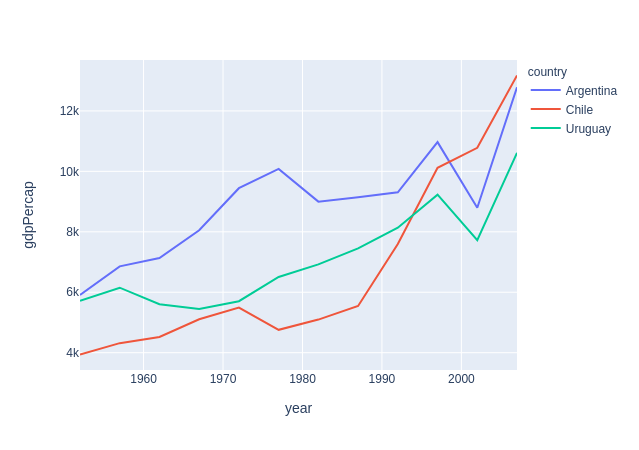

In [17]:
df_sur = df[(df.country=="Argentina" )| (df.country=="Chile") | (df.country=="Uruguay")]
fig = px.line(df_sur, x="year", y="gdpPercap", color='country')
fig.show()

Usamos `plotly.express` cuando hacemos un ejercicio sencillo. Para comenzar a ejemplos más genéricos o en algunos casos, más complejos, vamos a usar `go.Scatter`

Como primer ejemplo, vamos a usar una función de los DataFrame llamada `pivot_table` que nos va a permitir modificar nuestra serie del tipo [Fecha, PIB, Pais] a [Fecha, PIB, Argentina, Chile, Uruguay]. 

In [18]:
df.head()

country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
48  Argentina  Americas  1952   62.485  17876956  5911.315053       ARG   
49  Argentina  Americas  1957   64.399  19610538  6856.856212       ARG   
50  Argentina  Americas  1962   65.142  21283783  7133.166023       ARG   
51  Argentina  Americas  1967   65.634  22934225  8052.953021       ARG   
52  Argentina  Americas  1972   67.065  24779799  9443.038526       ARG   

    iso_num  
48       32  
49       32  
50       32  
51       32  
52       32

In [19]:
import pandas as pd
df_sur2 = pd.pivot_table(df_sur, values=["gdpPercap"], index=["year"], columns="country" )
df_sur2.head()


gdpPercap                          
country    Argentina        Chile      Uruguay
year                                          
1952     5911.315053  3939.978789  5716.766744
1957     6856.856212  4315.622723  6150.772969
1962     7133.166023  4519.094331  5603.357717
1967     8052.953021  5106.654313  5444.619620
1972     9443.038526  5494.024437  5703.408898

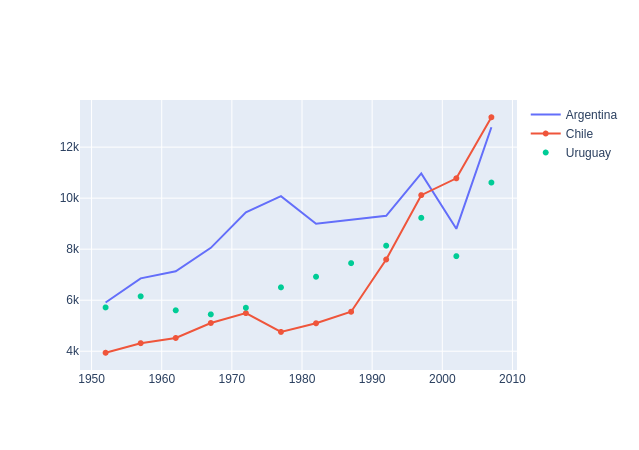

In [26]:
#Importamos la librería
import plotly.graph_objects as go

#Creamos figura
fig = go.Figure()
#Primer plot

#go.Scatter(x=variable_x, y=variable_y)
fig.add_trace(go.Scatter(x=df_sur2.index, y=df_sur2.gdpPercap.Argentina,
                    mode='lines',
                    name='Argentina'))

#Segundo plot
fig.add_trace(go.Scatter(x=df_sur2.index, y=df_sur2.gdpPercap.Chile,
                    mode='lines+markers',
                    name='Chile'))

# #Tercer plot
fig.add_trace(go.Scatter(x=df_sur2.index, y=df_sur2.gdpPercap.Uruguay,
                    mode='markers', name='Uruguay'))

fig.show()

## 4. Gráfico de puntos (scatter) 
Para un gráfico simple podemos volver a usar `plotly.express`

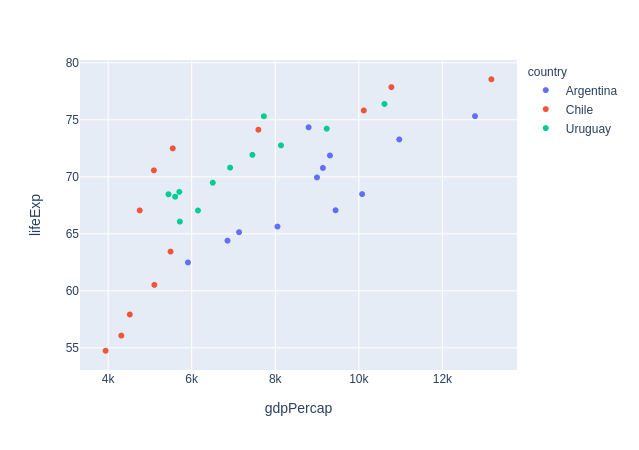

In [27]:
#Definimos el tipo gráfico
fig = px.scatter(df_sur, x="gdpPercap", y="lifeExp", color = "country")
fig.show()

Podemos agregar una tercera dimensión, representada en el tamaño de la burbuja. Para esto usamos el argumento `size` y podemos transformlo en un `gráfico de burbujas`.

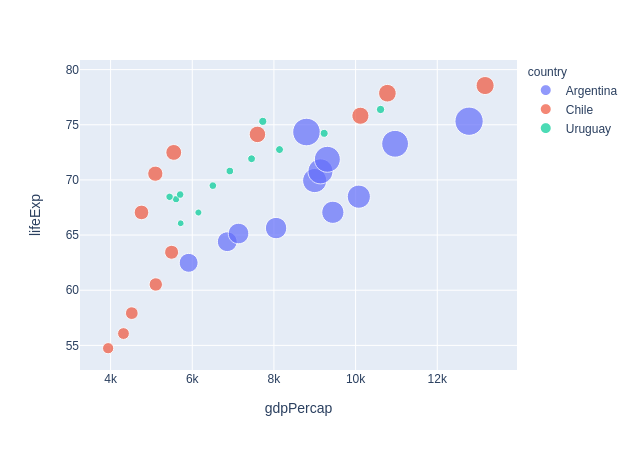

In [28]:
#Definimos el tipo gráfico
fig = px.scatter(df_sur, x="gdpPercap", y="lifeExp", color = "country", size="pop")
fig.show()

Otro ejemplo es agregar una escala de colores para resaltar una categoría

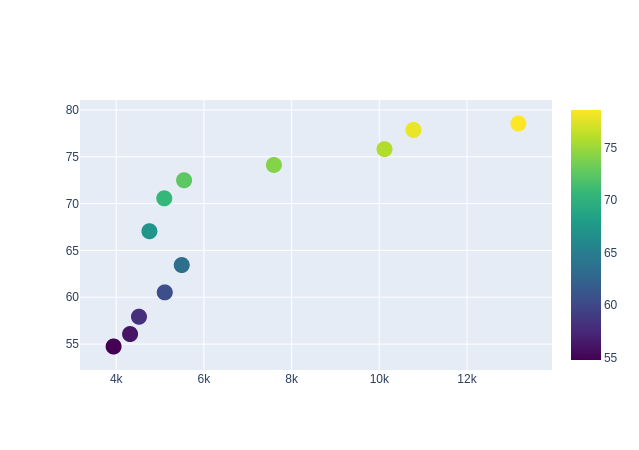

In [33]:
import plotly.graph_objects as go
import numpy as np

df_chile = df[(df.country=="Chile")]

fig = go.Figure(data=go.Scatter(
    x = df_chile.gdpPercap,
    y = df_chile.lifeExp,
    mode='markers',
    marker=dict(
        size=16,
        color=df_chile.lifeExp, #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True
    )
))

fig.show()

## 5. Gráfico de barras

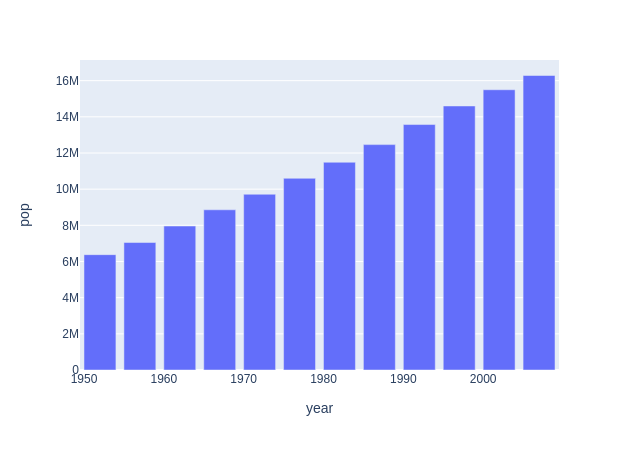

In [25]:
fig = px.bar(df_chile, x='year', y='pop')
fig.show()

In [26]:
df_total = px.data.gapminder()
df_2007 = df_total[df_total.year==2007]
df_2007.head()

country continent  year  lifeExp       pop     gdpPercap iso_alpha  \
11  Afghanistan      Asia  2007   43.828  31889923    974.580338       AFG   
23      Albania    Europe  2007   76.423   3600523   5937.029526       ALB   
35      Algeria    Africa  2007   72.301  33333216   6223.367465       DZA   
47       Angola    Africa  2007   42.731  12420476   4797.231267       AGO   
59    Argentina  Americas  2007   75.320  40301927  12779.379640       ARG   

    iso_num  
11        4  
23        8  
35       12  
47       24  
59       32

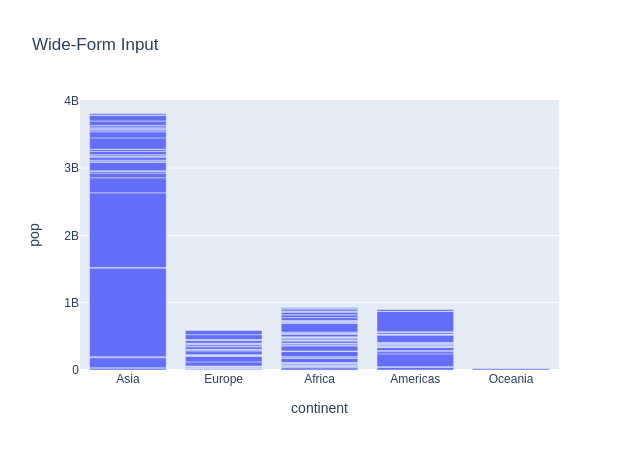

In [27]:
fig = px.bar(df_2007, x="continent", y="pop", title="Wide-Form Input")
fig.show()

## 6. Gráfico de torta

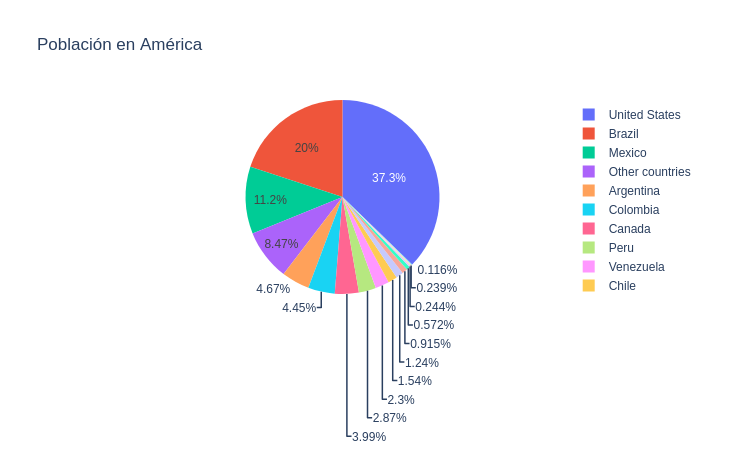

In [35]:
df.loc[df['pop'] < 8.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', names='country', title='Población en América')
fig.show()

## 7. Animación

In [36]:
df.head()

country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
48  Argentina  Americas  1952   62.485  17876956  5911.315053       ARG   
49  Argentina  Americas  1957   64.399  19610538  6856.856212       ARG   
50  Argentina  Americas  1962   65.142  21283783  7133.166023       ARG   
51  Argentina  Americas  1967   65.634  22934225  8052.953021       ARG   
52  Argentina  Americas  1972   67.065  24779799  9443.038526       ARG   

    iso_num  
48       32  
49       32  
50       32  
51       32  
52       32

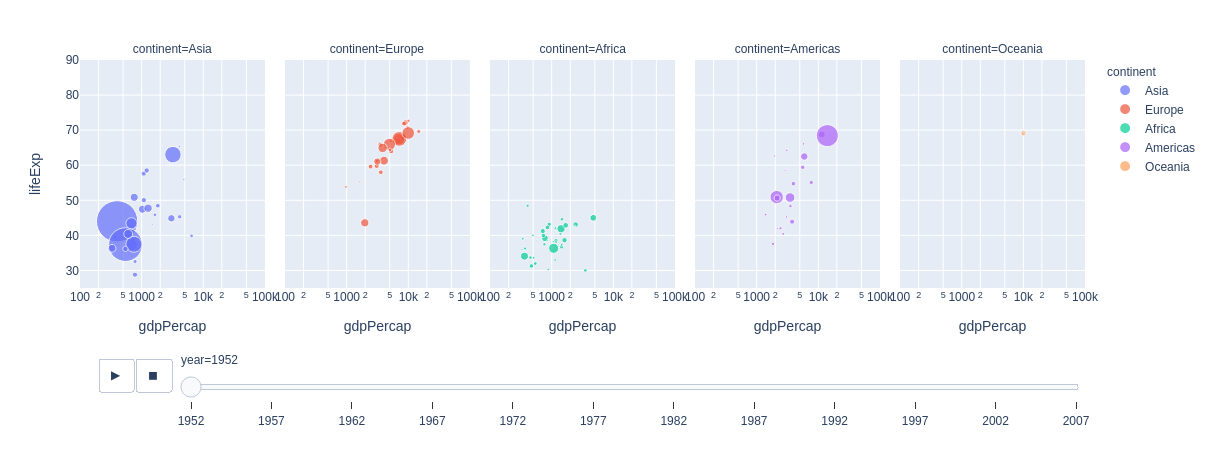

In [48]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(df, x="gdpPercap", y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
                 size="pop", 
                 color="continent", 
                 hover_name="country", 
                 facet_col="continent",
                 log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90]
                )
fig.show()

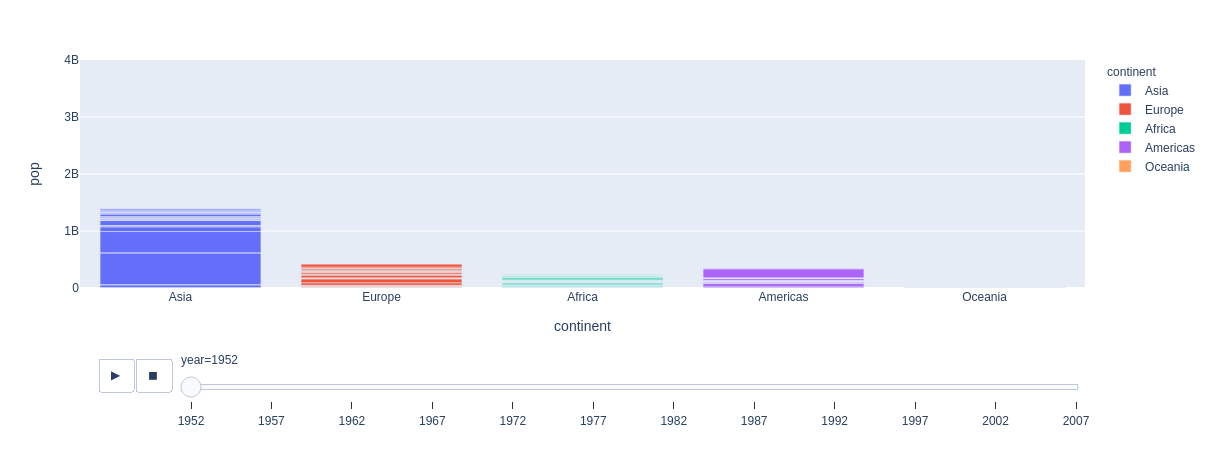

In [49]:
fig = px.bar(df, x="continent", y="pop", 
             color="continent",
             animation_frame="year", 
             animation_group="country", 
             range_y=[0,4000000000])
fig.show()

## 8. Mapa de calor 

In [50]:
df = px.data.gapminder().query("continent=='Americas'")
df.head()

country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
48  Argentina  Americas  1952   62.485  17876956  5911.315053       ARG   
49  Argentina  Americas  1957   64.399  19610538  6856.856212       ARG   
50  Argentina  Americas  1962   65.142  21283783  7133.166023       ARG   
51  Argentina  Americas  1967   65.634  22934225  8052.953021       ARG   
52  Argentina  Americas  1972   67.065  24779799  9443.038526       ARG   

    iso_num  
48       32  
49       32  
50       32  
51       32  
52       32

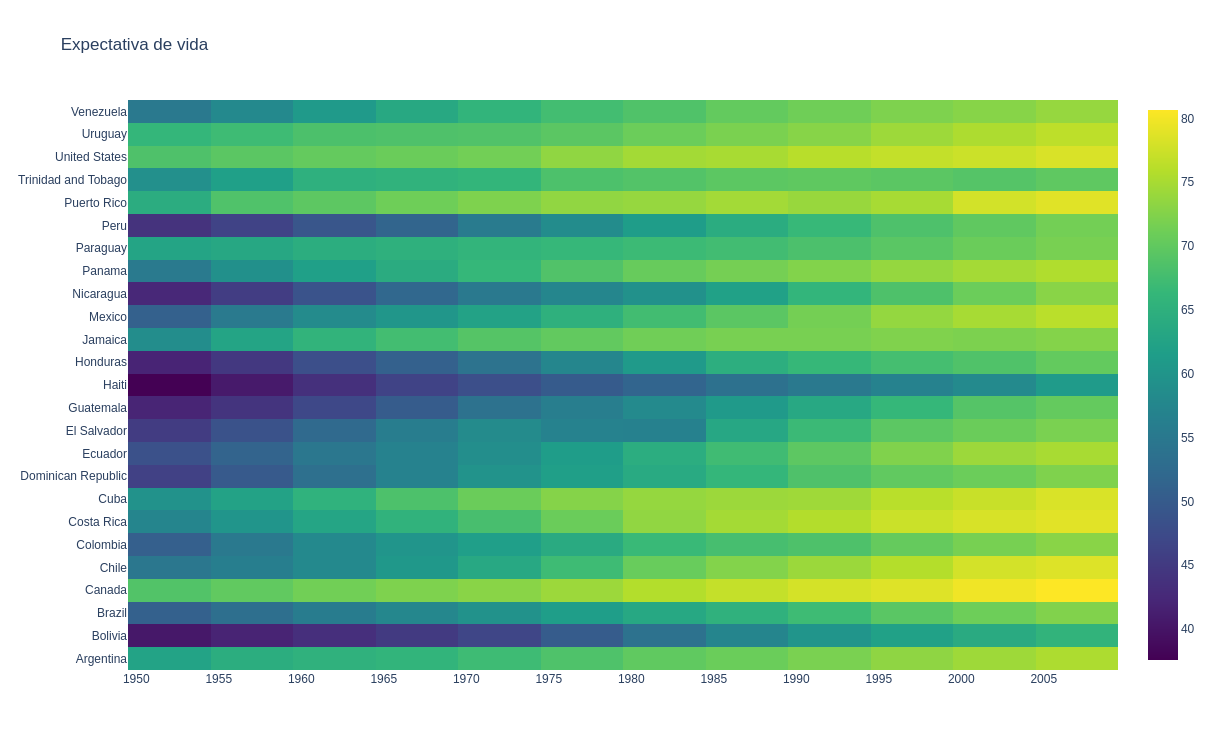

In [53]:
fig = go.Figure(data=go.Heatmap(
        z=df.lifeExp,
        x=df.year,
        y=df.country,
        colorscale='Viridis'
        ))

fig.update_layout(
    title='Expectativa de vida',
    xaxis_nticks=13)

fig.update_layout(width=750, height=750)
fig.show()

## 9. sunburst charts

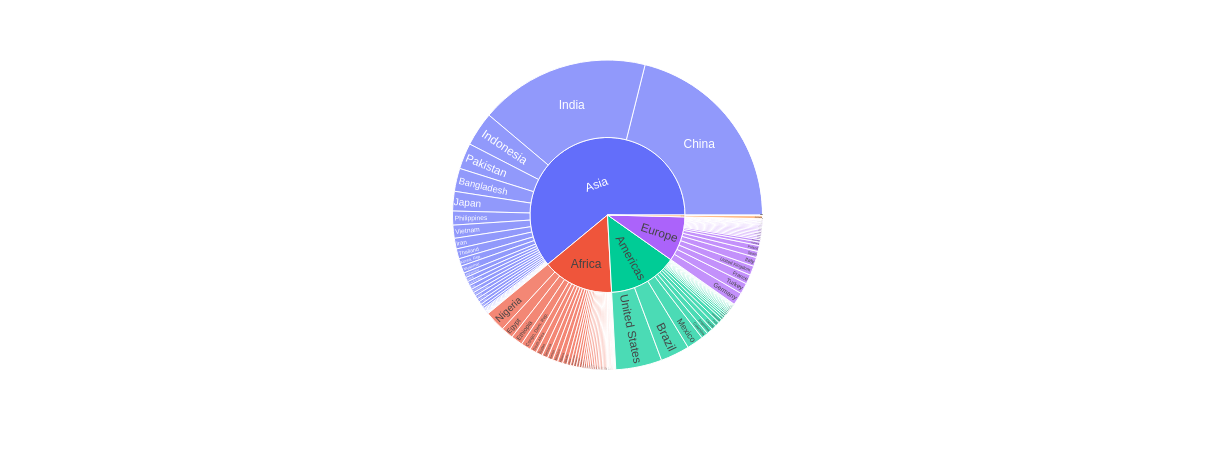

In [56]:
import plotly.express as px

df = px.data.gapminder().query("year == 2007")


fig = px.sunburst(df, path=['continent', 'country'], values='pop', color='lifeExp',
                  hover_data=['iso_alpha'])
fig.show()


## 10. Treemap

In [57]:
df.head()

country continent  year  lifeExp       pop     gdpPercap iso_alpha  \
11  Afghanistan      Asia  2007   43.828  31889923    974.580338       AFG   
23      Albania    Europe  2007   76.423   3600523   5937.029526       ALB   
35      Algeria    Africa  2007   72.301  33333216   6223.367465       DZA   
47       Angola    Africa  2007   42.731  12420476   4797.231267       AGO   
59    Argentina  Americas  2007   75.320  40301927  12779.379640       ARG   

    iso_num  
11        4  
23        8  
35       12  
47       24  
59       32

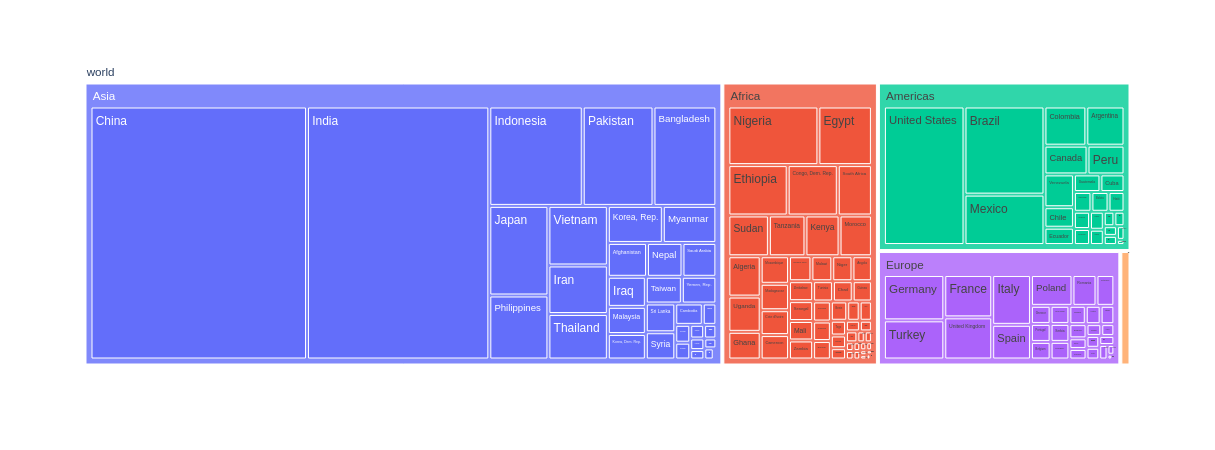

In [60]:
import plotly.express as px
import numpy as np
df = px.data.gapminder().query("year == 2007")

fig = px.treemap(df, path=[px.Constant('world'), 'continent', 'country'], values='pop',  
                  hover_data=['iso_alpha'])
fig.show()

## 11. Histograma

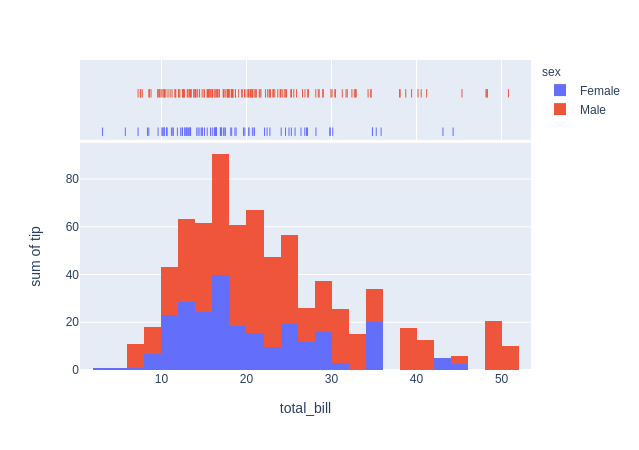

In [58]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="total_bill", y="tip", color="sex", marginal="rug", hover_data=df.columns)
fig.show()

## 12. box plots

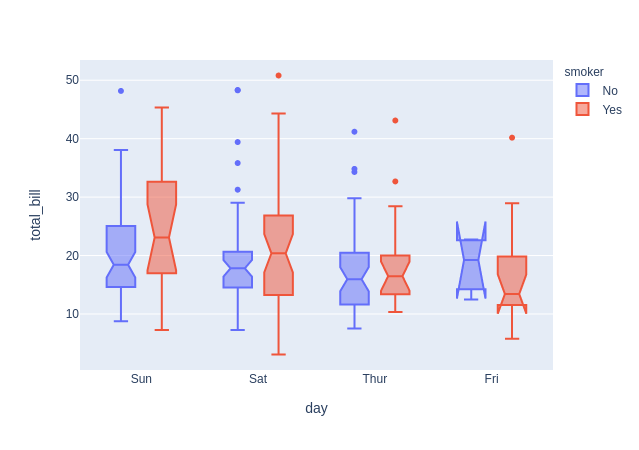

In [59]:
import plotly.express as px
df = px.data.tips()
fig = px.box(df, x="day", y="total_bill", color="smoker", notched=True)
fig.show()


# Actividad
**Instrucciones:** 
- Cada pregunta la debe responder en una celda diferente (en total 4 celdas de código). 
- Antes de cada celda de código debe ir un `markdown` que muestre la pregunta que está respondiendo. 
- En la celda de código debe agregar un breve comentario de qué está haciendo.  

Revisar las bases y ver como vienen. Limpiar (en excel) para que sea sencillo importar los datos. Por ejemplo, en la base de EMPLEO las primeras 5 filas son celdas vacías o título de la hoja. Eso se puede borrar. Las columnas "C", "E" y otras son columnas en blanco, eliminar para que no queden a la hora de importar. La fila 7 tiene un subtítulo "en miles" que no aporta, también se puede eliminar. La idea es que las bases queden sólo con las filas y columnas que va a importar a python. 

Utilizando `pandas` importar las 4 bases, llamar: DF_IMACEC, DF_EMP, DF_IMP, DF_EXP. Limpiar para que se puedan trabajar (cambiar los nombres de variables, chequear el tipo de datos, revisar en qué fecha parten).

1. Crear un DataFrame que tenga la variación porcentual anual de personas para las categorías independientes (total) y asalariados (total). 
2. Usando el DataFrame del IMACEC, transponer para que las fechas queden en las filas y las categorías como columnas. Para esto puede usar la función de pandas `pivot_table`. 
3. Al DF del punto 1), agregar la variación porcentual anual del `imacec` del punto 2), usando un `inner join`. 
4. Utilizando `plotly`, crear un `subplot` que contenga: 
    1) Gráfico con la variación anual de independientes, asalariados e IMACEC. Debe usar líneas, markes o dash para diferenciar las tres líneas. 
    2)  Usando los DataFrame de exportaciones (EXP) e importaciones (IMP), crear un gráfico de `scatter` que tenga el total de exportaciones en el eje horizontal y el total de importaciones (CIF) en el vertical. Agregue al gráfico una línea de 45°.
    3) Dentro de las exportaciones seleccione: total exportaciones, minería,  agropecuario-silvícola y pesquero, industriales. Utilizando la primera fecha (enero-2009) como base 100, crear un mapa de calor que en el eje horizontal tenga las fechas y en el vertical las 4 categorías. Cambie la escala de colores (no utilizar el por defecto). 
    
Cada gráfico debe tener un subtítulo, nombre de ejes y una leyenda -según corresponda-. 
*hint: la clave es que ordene bien los datos antes del gráfico. Luego piense bien a qué debe llegar.*